# SIT720 Assignment 3
Bryon Baker

Student number: 85031775

In [1]:
# TOTO: Uncomment this before submitting the assignment

#!pip3 install numpy
#!pip3 install pandas
#!pip3 install scikit-learn

In [2]:
import warnings
import random
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 

# Configure ssl for unverified content so we can load a dataset from an unknown source (github).
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Question 1

Load and explore the training dataset. Explain the steps that you have taken.

In [3]:
import os

train_url = 'https://raw.githubusercontent.com/bryonbaker/datasets/main/SIT720/Ass3/ac_train_data.csv'
test_url = 'https://raw.githubusercontent.com/bryonbaker/datasets/main/SIT720/Ass3/ac_test_data.csv'
train_path = '/opt/app-root/src/datasets/SIT720/Ass3/ac_train_data.csv'
test_path = '/opt/app-root/src/datasets/SIT720/Ass3/ac_test_data.csv'

#
# Work out if the datasets are local. If not use a remote url. Preference is local.
#
print("Load datasets from local or remote resource:")
print("="*50)
if os.path.isfile(train_path):
    print("Training data is local")
    training_data = train_path
else:
    print("Training data is remote. Downloading file from: {}".format(train_url))
    training_data = train_url

if os.path.isfile(test_path):
    print("Test data is local")
    test_data = test_path
else:
    print("Test data is remote. Downloading file from: {}".format(test_url))
    test_data = test_url
print()

# Load the datasets from either local or remote.
train_df = pd.read_csv(training_data)
test_df = pd.read_csv(test_data)

Load datasets from local or remote resource:
Training data is local
Test data is local



In [4]:
# Drop the columns not used in the assignment

# Drop the sequence number (column 0) from the test dataset. Column 0 is unlabeled so use the index number.
train_df = train_df.drop(train_df.columns[[0]],axis=1)
test_df = test_df.drop(test_df.columns[[0]],axis=1)

In [5]:
# Ordinal encode the days of week.

oldCol = "dayofweek"
newCol = "dayofweeknum"
dayMap = {'Sun' : 0, 'Mon': 1, "Tue" : 2, "Wed" : 3, "Thu" : 4, "Fri" : 5, "Sat" : 6 }    # How to map the values

train_df[newCol] = train_df[oldCol].map(dayMap)    # Adds a new column with proper boolean values
train_df = train_df.drop([oldCol], axis=1)    # Drop the old column before renaming the new column to the name just dropped
train_df = train_df.rename(columns={newCol : oldCol})
      
train_df.head()

,load,ac,hourofday,dif,absdif,max,var,entropy,nonlinear,hurst,dayofweek
0,2.245,0,0,0.987,0.987,6.215,3.074549,0.678886,0.052903,0.994071,0
1,2.259,0,0,0.014,0.014,6.215,3.172867,0.667450,0.054829,0.994154,0
2,2.269,0,0,0.010,0.010,6.215,3.270112,0.647777,0.056991,0.994220,0
3,2.268,0,0,-0.001,0.001,6.215,3.303763,0.629227,0.057606,0.994150,0
4,2.270,0,0,0.002,0.002,6.215,3.302744,0.621295,0.082640,0.994041,0


In [6]:
# Ordinal encode the dayof week in the test dataset.
test_df[newCol] = test_df[oldCol].map(dayMap)    # Adds a new column with proper boolean values
test_df = test_df.drop([oldCol], axis=1)    # Drop the old column before renaming the new column to the name just dropped
test_df = test_df.rename(columns={newCol : oldCol})
      
test_df.head()

,load,ac,hourofday,dif,absdif,max,var,entropy,nonlinear,hurst,dayofweek
0,1.869,0,0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1
1,1.673,0,0,-0.196,0.196,0.0,0.0,0.0,0.0,0.0,1
2,1.660,0,0,-0.013,0.013,0.0,0.0,0.0,0.0,0.0,1
3,1.772,0,0,0.112,0.112,0.0,0.0,0.0,0.0,0.0,1
4,1.679,0,0,-0.093,0.093,0.0,0.0,0.0,0.0,0.0,1


In [7]:
# Split out the X and y from the datasets
train_X = train_df.drop(['ac'], axis=1)
train_y = train_df["ac"]
test_X = test_df.drop(['ac'], axis=1)
test_y = test_df['ac']

print("Training Dataset")
print(f"{train_X.head()}\n")
print(f"{train_y.head()}\n")

print("Testing Dataset")
print(f"{test_X.head()}\n")
print(f"{test_y.head()}\n")

Training Dataset
    load  hourofday    dif  absdif    max       var   entropy  nonlinear  \
0  2.245          0  0.987   0.987  6.215  3.074549  0.678886   0.052903   
1  2.259          0  0.014   0.014  6.215  3.172867  0.667450   0.054829   
2  2.269          0  0.010   0.010  6.215  3.270112  0.647777   0.056991   
3  2.268          0 -0.001   0.001  6.215  3.303763  0.629227   0.057606   
4  2.270          0  0.002   0.002  6.215  3.302744  0.621295   0.082640   

      hurst  dayofweek  
0  0.994071          0  
1  0.994154          0  
2  0.994220          0  
3  0.994150          0  
4  0.994041          0  

0    0
1    0
2    0
3    0
4    0
Name: ac, dtype: int64

Testing Dataset
    load  hourofday    dif  absdif  max  var  entropy  nonlinear  hurst  \
0  1.869          0  0.000   0.000  0.0  0.0      0.0        0.0    0.0   
1  1.673          0 -0.196   0.196  0.0  0.0      0.0        0.0    0.0   
2  1.660          0 -0.013   0.013  0.0  0.0      0.0        0.0    0.0   


In [8]:
print("Summary Analysis of Dataset")
print(train_X.describe())
print()

print("Summary Analysis of the Class")
print(train_y.value_counts())

Summary Analysis of Dataset
                load      hourofday           dif         absdif  \
count  417720.000000  417720.000000  4.177200e+05  417720.000000   
mean        2.184664      11.484487 -7.038207e-07       0.159578   
std         1.890565       6.920358  5.309284e-01       0.506379   
min         0.298000       0.000000 -7.970000e+00       0.000000   
25%         0.807000       5.000000 -1.100000e-02       0.002000   
50%         1.279000      11.000000 -1.000000e-03       0.010000   
75%         3.358000      17.000000  8.000000e-03       0.043000   
max        11.794000      23.000000  7.619000e+00       7.970000   

                 max            var        entropy      nonlinear  \
count  417720.000000  417720.000000  417720.000000  417720.000000   
mean        3.977086       1.871247       0.707766       1.468806   
std         2.131094       1.787633       0.094367       2.610744   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.

Variable Correlation Matrix


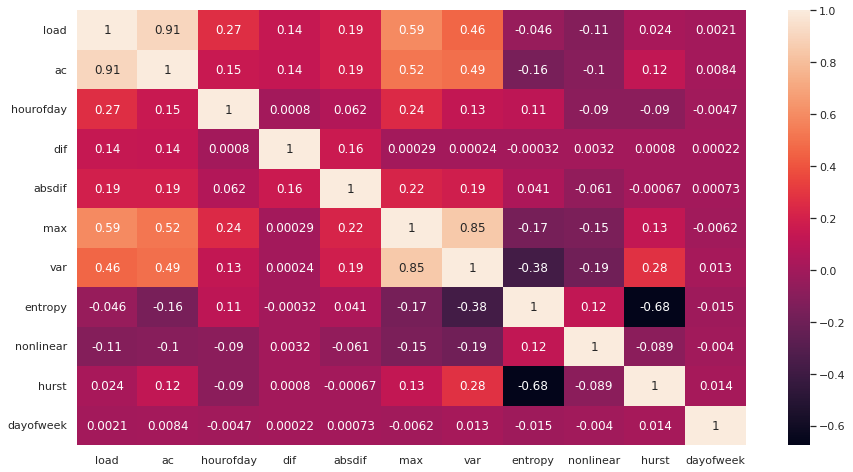

In [9]:
print("Variable Correlation Matrix")
corr_X = train_df.corr()
sn.set(rc = {'figure.figsize':(15,8)})
sn.heatmap(corr_X, annot=True)
plt.show()

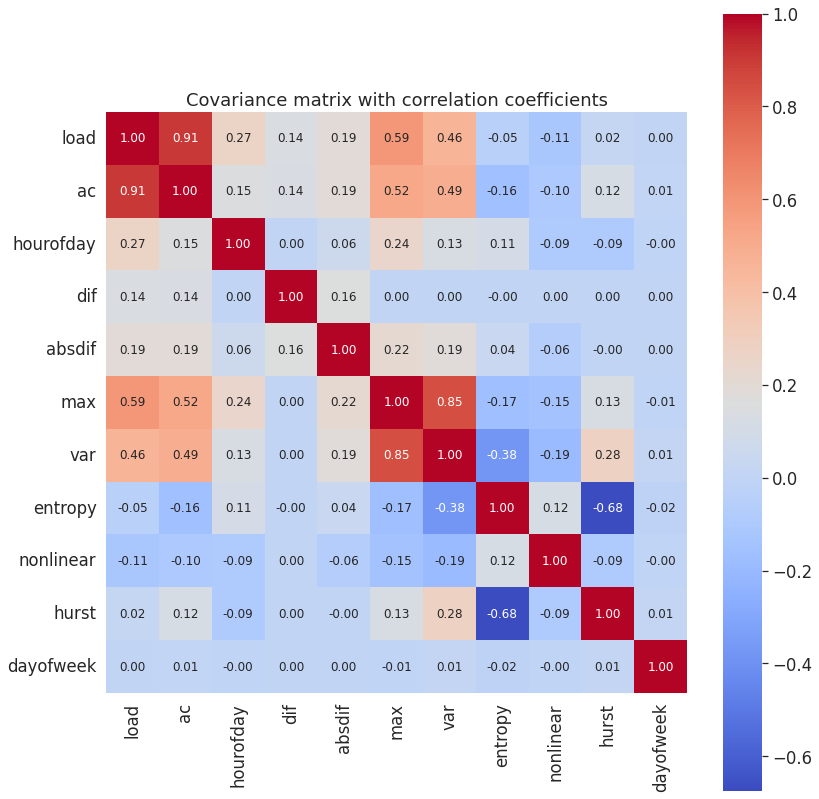

In [10]:
# Code snippet coutesy of: https://benjaminobi.medium.com/5-minutes-tutorial-on-how-to-compute-and-visualize-the-covariance-matrix-2597ab98d9ee#:~:text=The%20covariance%20matrix%20gives%20the,that%20displays%20the%20correlation%20coefficients.
#
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(train_df[train_df.columns].iloc[:,range(0,len(train_df.columns))].values)
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(12,12))
sn.set(font_scale=1.5)
hm = sn.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=train_df.columns,
                 xticklabels=train_df.columns)
plt.title('Covariance matrix with correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

In [11]:
# Generate a pairplot
#sn.pairplot(train_df[train_X.columns], height=2.0)

# Question 2
Analyse the importance of the feautues for predicting air conditioner status using two different approaches.

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif

def plotFeaturePerformance( fs, ticks, title ):
    # what are scores for the features
    for i in range(len(fs.scores_)):
        print('Feature %d: %f' % (i, fs.scores_[i]))
        
    # plot the scores
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.xlabel("Feature")
    plt.ylabel("K-Best Score")
    plt.title(label=title, loc="center")
    plt.xticks(np.arange(len(ticks)), labels=ticks, rotation=70)
    
    plt.show()

def selectFeatures( X_train, y_pred, criteria, num_features ):
    fs = SelectKBest(criteria, k=num_features)
    fs.fit(X_train,y_pred)
    new_x_train = fs.transform(X_train)
    
    return new_x_train, fs

In [13]:
# Define the number of features to find.
num_features = 5
print("Column names:\n{}".format(train_X.columns))
new_x_train1, fs1 = selectFeatures( train_X, train_y, f_classif, num_features )
new_x_train2, fs2 = selectFeatures( train_X, train_y, f_regression, num_features )

Column names:
Index(['load', 'hourofday', 'dif', 'absdif', 'max', 'var', 'entropy',
       'nonlinear', 'hurst', 'dayofweek'],
      dtype='object')


Feature 0: 1965360.570073
Feature 1: 9794.751825
Feature 2: 7858.763535
Feature 3: 15936.573793
Feature 4: 153445.765468
Feature 5: 134719.813549
Feature 6: 11663.758853
Feature 7: 4233.177434
Feature 8: 5883.074959
Feature 9: 29.446552


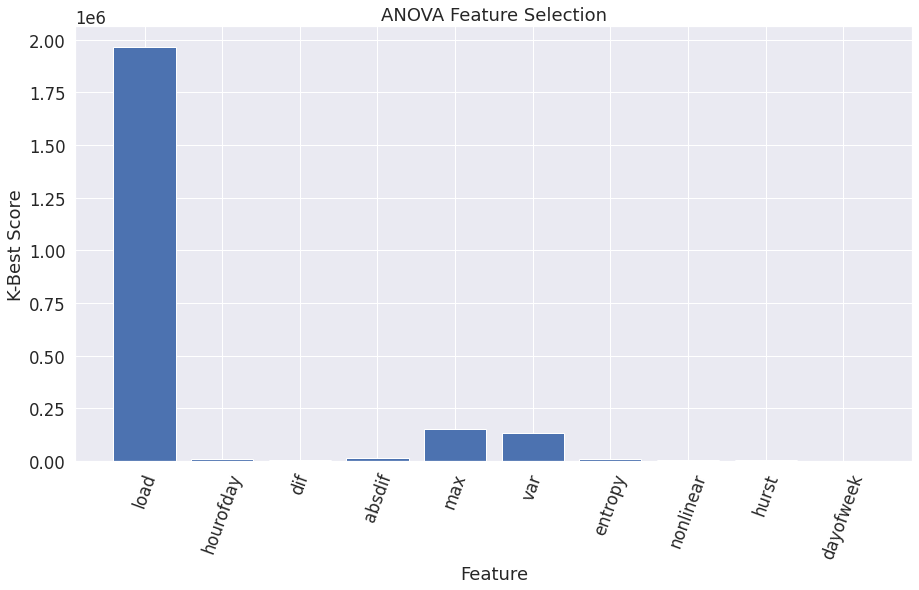

In [14]:
# Plot the feature selection charts.
plotFeaturePerformance( fs1, train_X.columns, "ANOVA Feature Selection" )

Feature 0: 1965360.570075
Feature 1: 9794.751825
Feature 2: 7858.763535
Feature 3: 15936.573793
Feature 4: 153445.765468
Feature 5: 134719.813549
Feature 6: 11663.758853
Feature 7: 4233.177434
Feature 8: 5883.074959
Feature 9: 29.446552


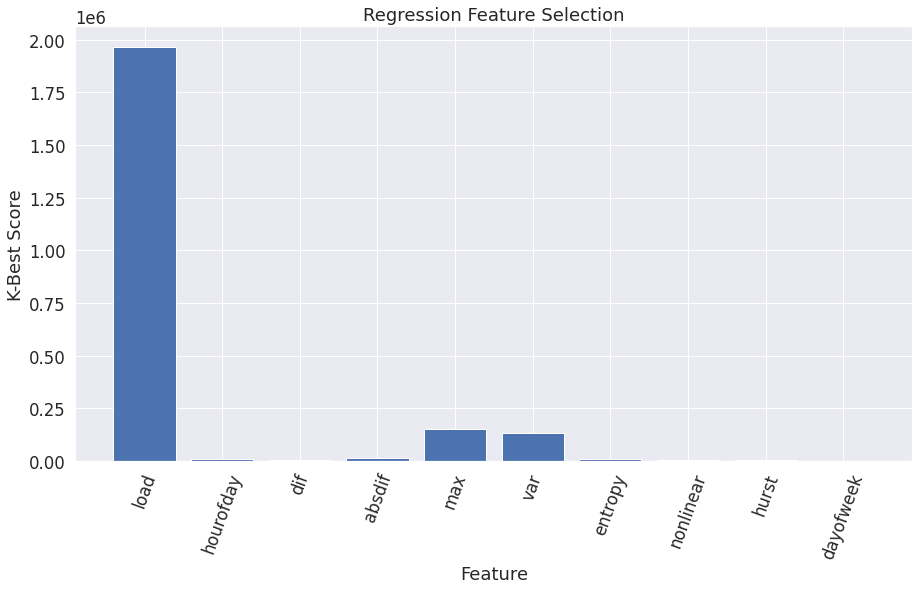

In [15]:
plotFeaturePerformance( fs2, train_X.columns, "Regression Feature Selection" )

In [16]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
Xnorm = scale(train_X)

# Perform the Principal Component Analysis. The number of components is the number of coumns in the dataset.
# The number of components is the minimum of the number of data elements and festures 
n_components=min(train_X.shape[0], train_X.shape[1])
print("Number of comoponets: {}".format(n_components))
n_components=7
pca = PCA(n_components)
Xnew = pca.fit_transform(Xnorm)
print("PCA details => {}".format(pca))

print(pca.get_params())

print('='*50)
print("Explained Variance:")
# Calculate the amount of variance explained by each PC
var= pca.explained_variance_ratio_
print(var)

print('='*50)
print("Cumulative Explained Variance:")

#cum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
cum_var=np.cumsum(pca.explained_variance_ratio_*100)
print(cum_var)

dimensions = {}

# Find the minimum dimensions that capture 85% and 95% respectively
num_dimensions = 0
for value in cum_var:
    if value >= 85:
        dimensions[value]=num_dimensions
        break
    num_dimensions += 1

num_dimensions = 0
for value in cum_var:
    if value >= 95:
        dimensions[value]=num_dimensions
        break
    num_dimensions += 1

print('='*50)

Number of comoponets: 10
PCA details => PCA(n_components=7)
{'copy': True, 'iterated_power': 'auto', 'n_components': 7, 'random_state': None, 'svd_solver': 'auto', 'tol': 0.0, 'whiten': False}
Explained Variance:
[0.26805069 0.16949796 0.11098643 0.09995123 0.09494228 0.08639147
 0.07730794]
Cumulative Explained Variance:
[26.80506905 43.75486477 54.85350804 64.8486306  74.3428584  82.98200525
 90.71279927]


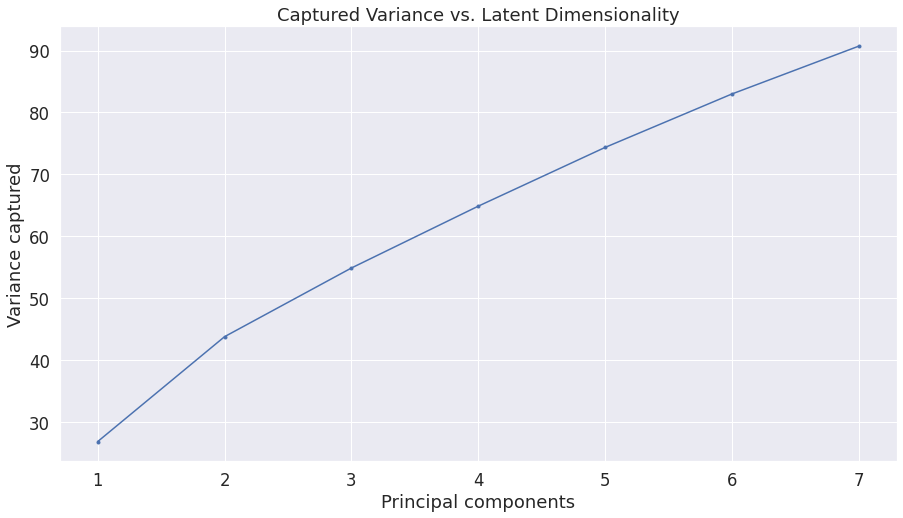

The minimum dimension that captures at least 91% variance is: 6


In [17]:
pca_num = a_list = list(range(1, n_components+1))
plt.plot(pca_num, cum_var, marker='.')
plt.xlabel("Principal components")
plt.ylabel("Variance captured")
plt.title(label="Captured Variance vs. Latent Dimensionality", loc="center")
plt.show()

for key,value in dimensions.items():
    print("The minimum dimension that captures at least {:.0f}% variance is: {}".format(key,value))

In [18]:
print(pca.components_)

[[ 0.4136197   0.16870047  0.05244207  0.18824096  0.53360172  0.54465109
  -0.28680188 -0.18683288  0.25234518  0.00765095]
 [ 0.30054484  0.35948565  0.11188161  0.22515584  0.178809   -0.01530307
   0.58629036  0.02577223 -0.58296344 -0.02786398]
 [ 0.03049698 -0.27599489  0.77850801  0.50965239 -0.12997361 -0.09420898
  -0.05767422  0.1302758   0.1007417   0.02934299]
 [-0.00333893 -0.02576101  0.01798983  0.00344505  0.01406988  0.00138708
  -0.01933977  0.03991924  0.02148007 -0.99817878]
 [ 0.11194558 -0.19726843 -0.12783213 -0.07621881  0.19428049  0.1537297
   0.00769343  0.92896711 -0.0155393   0.0417697 ]
 [-0.1632137  -0.58687994 -0.46666383  0.55076803  0.10698344  0.1440968
   0.14150839 -0.17393774 -0.15912065 -0.00223127]
 [-0.19594797  0.59023551 -0.29083845  0.5797916  -0.15706813 -0.16754008
  -0.12263242  0.22281009  0.27394982 -0.00308291]]


In [19]:
train_X.shape[0]

417720

# Question 3
Based on the training data, create three different supervised machine learning models excet any ensemble approach for predicting air conditioner status
   1.	Report performance score using a suitable metric on the test data. Is it possible that the presented result is an underfitted or overfitted one? Justify.  
   2.	Justify different design decisions for each ML model used to answer this question.
   3.	Have you optimised any hyper-parameters for each ML model? What are they? Why have you done that? Explain. 
   4.	Finally, make a recommendation based on the reported results and justify it.

In [27]:
# Decision Tree

# Use TimeSeriesSplit. We will make the time series the equivalent of 4 hour periods (even though the back of the data is not continuous)
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

# Define the split details.\
n_splits = 10
test_size = int(train_X.shape[0]/11)
print("Number of splits: {}".format(n_splits))

tscv = TimeSeriesSplit(n_splits, test_size=test_size)

model = LogisticRegression(max_iter=10000)
average_acc = []

i = 1
for train_index, test_index in tscv.split(train_X):
#    print("TRAIN:", train_index, "TEST:", test_index)
    X_tr, X_val = train_X.iloc[train_index], train_X.iloc[test_index]
    y_tr, y_val = train_y.iloc[train_index], train_y.iloc[test_index]
    
    model.fit(X_tr, y_tr)
    yhat = model.predict(X_val)
    
    # Get the performance details
    acc = accuracy_score(y_val, yhat)
    average_acc.append(acc)
    print(f"Split: {i}: Accuracy: {acc}")
    i+=1
    
print("Average Accuracy: {}".format(np.mean(average_acc)))
    
    

Number of splits: 10
Split: 1: Accuracy: 0.9842260494022226
Split: 2: Accuracy: 0.9881234528888186
Split: 3: Accuracy: 0.989229472797177
Split: 4: Accuracy: 0.987070100595144
Split: 5: Accuracy: 0.98277768999842
Split: 6: Accuracy: 0.9818823405487965
Split: 7: Accuracy: 0.9616843103175857
Split: 8: Accuracy: 0.9861484173381787
Split: 9: Accuracy: 0.9810133249065149
Split: 10: Accuracy: 0.9878074472007162
Average Accuracy: 0.9829962605993574


In [46]:
from sklearn import metrics

def display_stats(y_test, y_pred):
    # Model Accuracy: how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

    # Model Precision: what percentage of positive tuples are labeled as such?
    print("Precision:",metrics.precision_score(y_test, y_pred))

    # Model Recall: what percentage of positive tuples are labelled as such?
    print("Recall:",metrics.recall_score(y_test, y_pred))

    #Calculate F1 Score
    print("F1 Score:",metrics.f1_score(y_test, y_pred))

    #Calculate Mean Absolute Error
    print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

    # kappa
    print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

    # ROC AUC
    print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

In [47]:
import warnings
# Some of the hyper parameter combinations are invalid. Supress the warnings.
warnings.filterwarnings('ignore')

In [48]:
# https://medium.com/keita-starts-data-science/time-series-split-with-scikit-learn-74f5be38489e
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

penalty = ['none','l2']     # have left out none because of feedback form previous runs and the fact it generates a ton of incompatable param warnings
solver = ['newton-cg', 'lbfgs', 'liblinear']
C = [100, 10, 1.0, 0.1, 0.01]


i = 1
score = []
for train_index, test_index in tscv.split(train_X):
    X_tr = train_X.iloc[train_index]
    X_val = train_X.iloc[test_index]
    y_tr = train_y.iloc[train_index]
    y_val = train_y.iloc[test_index]
    
    for p in penalty:
        for s in solver:
            for c in C:
                if p == 'none' and s == 'liblinear':
                    continue        # These are incompatible
                if p == 'l2' and c < 1.0:
                    continue        # These are incompatible
                model = LogisticRegression(max_iter=10000, penalty=p, solver=s, C=int(c))
                model.fit(X_tr, y_tr)
                y_pred = model.predict(X_val)
                display_stats(y_tr, y_pred)
                score.append([i,p,s,c,model.score(X_val, y_val)])
                print(".",end='')
    print(f"\niteration: {i}: {score}")
    i += 1
print("complete:")

Accuracy: 0.5250502729100833
Precision: 0.4527110841580064
Recall: 0.5541758056352286
F1 Score: 0.49833110814419224
Mean Absolute Error: 0.4749497270899167
Cohens kappa: 0.05601476780864889
ROC AUC: 0.5288198022799127
.Accuracy: 0.5250502729100833
Precision: 0.4527110841580064
Recall: 0.5541758056352286
F1 Score: 0.49833110814419224
Mean Absolute Error: 0.4749497270899167
Cohens kappa: 0.05601476780864889
ROC AUC: 0.5288198022799127
.Accuracy: 0.5250502729100833
Precision: 0.4527110841580064
Recall: 0.5541758056352286
F1 Score: 0.49833110814419224
Mean Absolute Error: 0.4749497270899167
Cohens kappa: 0.05601476780864889
ROC AUC: 0.5288198022799127
.Accuracy: 0.5250502729100833
Precision: 0.4527110841580064
Recall: 0.5541758056352286
F1 Score: 0.49833110814419224
Mean Absolute Error: 0.4749497270899167
Cohens kappa: 0.05601476780864889
ROC AUC: 0.5288198022799127
.Accuracy: 0.5250502729100833
Precision: 0.4527110841580064
Recall: 0.5541758056352286
F1 Score: 0.49833110814419224
Mean Abs

KeyboardInterrupt: 